In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
data = pd.read_csv("data.csv")
data.shape

(8518, 8)

In [ ]:
data.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb-21,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb-21,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr-21,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr-16,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [ ]:
data.tail(15)

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8503,darwin,Yones Mavis 350 Blue cap,NaN,2.0,0.0,Apr-16,Wrost and duplicate productDon't buy this sell...,1
8504,naresh g,For Mavis350,NaN,2.0,1.0,Aug-16,Received product intact and sealedREAD MORE,5
8505,MD. Jabbar,Very Good,NaN,1.0,0.0,Sep-16,Delivered before time but price is high from m...,3
8506,Abani Behera,Don't waste your money,NaN,0.0,2.0,Sep-16,up to the mark but same is available in market...,4
8507,vishnu varma,Really Nice,"Certified Buyer, Agartala",0.0,1.0,Sep-16,Nice delivery speedREAD MORE,5
8508,NaN,NaN,NaN,NaN,NaN,NaN,No complaints about the item . Its the best on...,5
8509,NaN,NaN,NaN,NaN,NaN,NaN,Not sure why we have charged for this product ...,1
8510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [ ]:
# Display summary statistics
print(data.describe())

          Up Votes   Down Votes      Ratings
count  8508.000000  8508.000000  8518.000000
mean      0.391396     0.121768     4.181028
std      11.613909     3.248022     1.262200
min       0.000000     0.000000     1.000000
25%       0.000000     0.000000     4.000000
50%       0.000000     0.000000     5.000000
75%       0.000000     0.000000     5.000000
max     889.000000   219.000000     5.000000


In [ ]:
data.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [ ]:
data.dropna(subset=['Review text'], inplace=True)

In [ ]:
data['Review text'].isnull().sum()

0

In [ ]:
data.isnull().sum()

Reviewer Name        2
Review Title         2
Place of Review     42
Up Votes             2
Down Votes           2
Month              457
Review text          0
Ratings              0
dtype: int64

In [ ]:
df = data[['Review text', 'Ratings']]
df.rename(columns={'Review text': 'Text'}, inplace=True)


In [ ]:
df.shape

(8510, 2)

In [ ]:
df.count()

Text       8510
Ratings    8510
dtype: int64

In [ ]:
df.nunique()

Text       4983
Ratings       5
dtype: int64

In [ ]:
df['Ratings'].value_counts()

5    5079
4    1744
1     766
3     615
2     306
Name: Ratings, dtype: int64

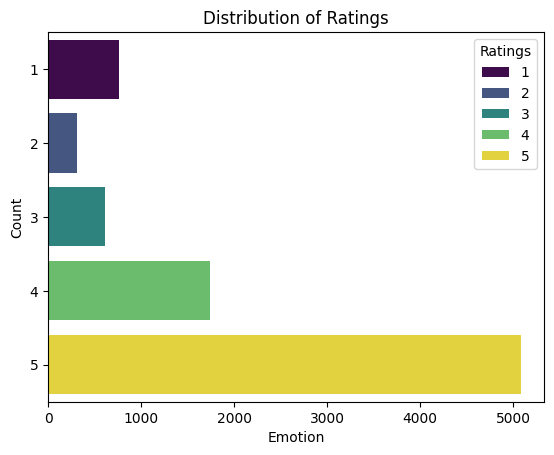

In [ ]:
# Assuming dataset is already loaded
sns.countplot(data=data, y='Ratings', hue='Ratings', palette = 'viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

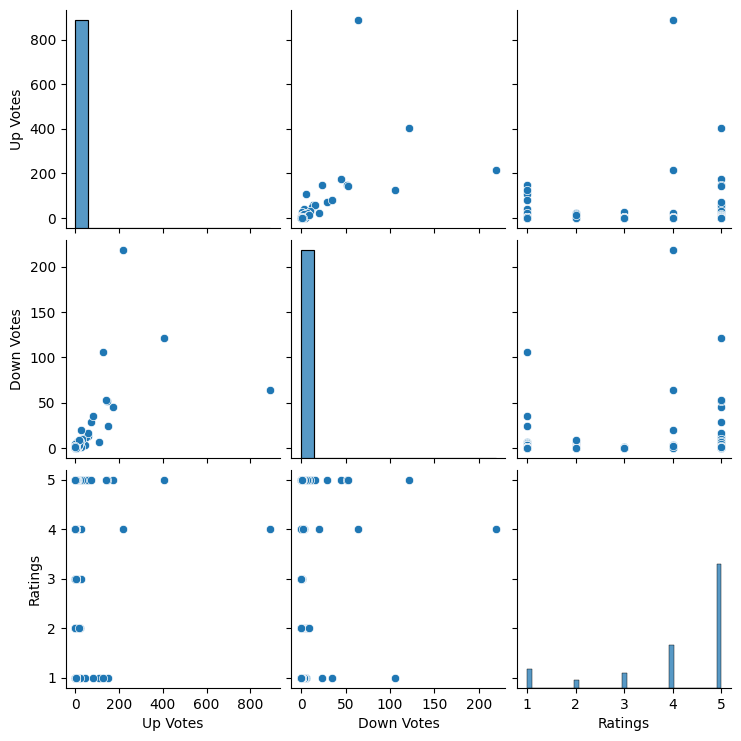

In [ ]:
# Visualize distributions and relationships
sns.pairplot(data)
plt.show()


In [ ]:
! pip install scikit-learn imbalanced-learn

In [ ]:
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def classify_review(rating):
    if rating >= 3:
        return "Positive"
    else:
        return "Negative"

# Apply the classification function to the Ratings column
df['Sentiment'] = df['Ratings'].apply(classify_review)
print(df)


                                                   Text  Ratings Sentiment
0     Nice product, good quality, but price is now r...        4  Positive
1     They didn't supplied Yonex Mavis 350. Outside ...        1  Negative
2     Worst product. Damaged shuttlecocks packed in ...        1  Negative
3     Quite O. K. , but nowadays  the quality of the...        3  Positive
4     Over pricedJust â?¹620 ..from retailer.I didn'...        1  Negative
...                                                 ...      ...       ...
8505  Delivered before time but price is high from m...        3  Positive
8506  up to the mark but same is available in market...        4  Positive
8507                       Nice delivery speedREAD MORE        5  Positive
8508  No complaints about the item . Its the best on...        5  Positive
8509  Not sure why we have charged for this product ...        1  Negative

[8510 rows x 3 columns]


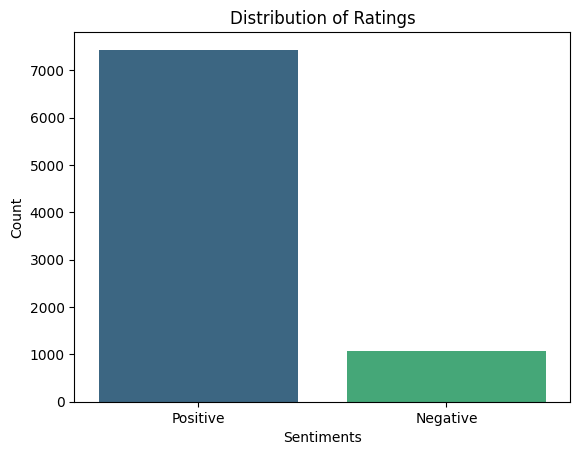

In [ ]:
sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette = 'viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

## Identify input and output

In [ ]:
#input data
X = df[['Text']]

# output data
y = df['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (6808, 1)
Test set shape: (1702, 1)


,Text
1372,Very good.READ MORE
3846,Have been purchasing the shuttles from Flipkar...
333,Nice product. .READ MORE
1259,Worst on recent times.We played new Ball today...
3532,BetterREAD MORE
...,...
5734,genuine & orginal productREAD MORE
5191,Badminton shuttle is too goodREAD MORE
5390,best quality shuttle 🖤READ MORE
860,Nice happyREAD MORE


## Data Preprocessing

In [ ]:
import re

# Data preprocessing function
def preprocess_text(text):
    # remove special characters
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^A-Za-z0-9]', ' ', text)
    text = re.sub(r'READ MORE', '', text)

    # Lowercase
    text = text.lower()

    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)



### Data Preprocessing on Train data

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(20, 15))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

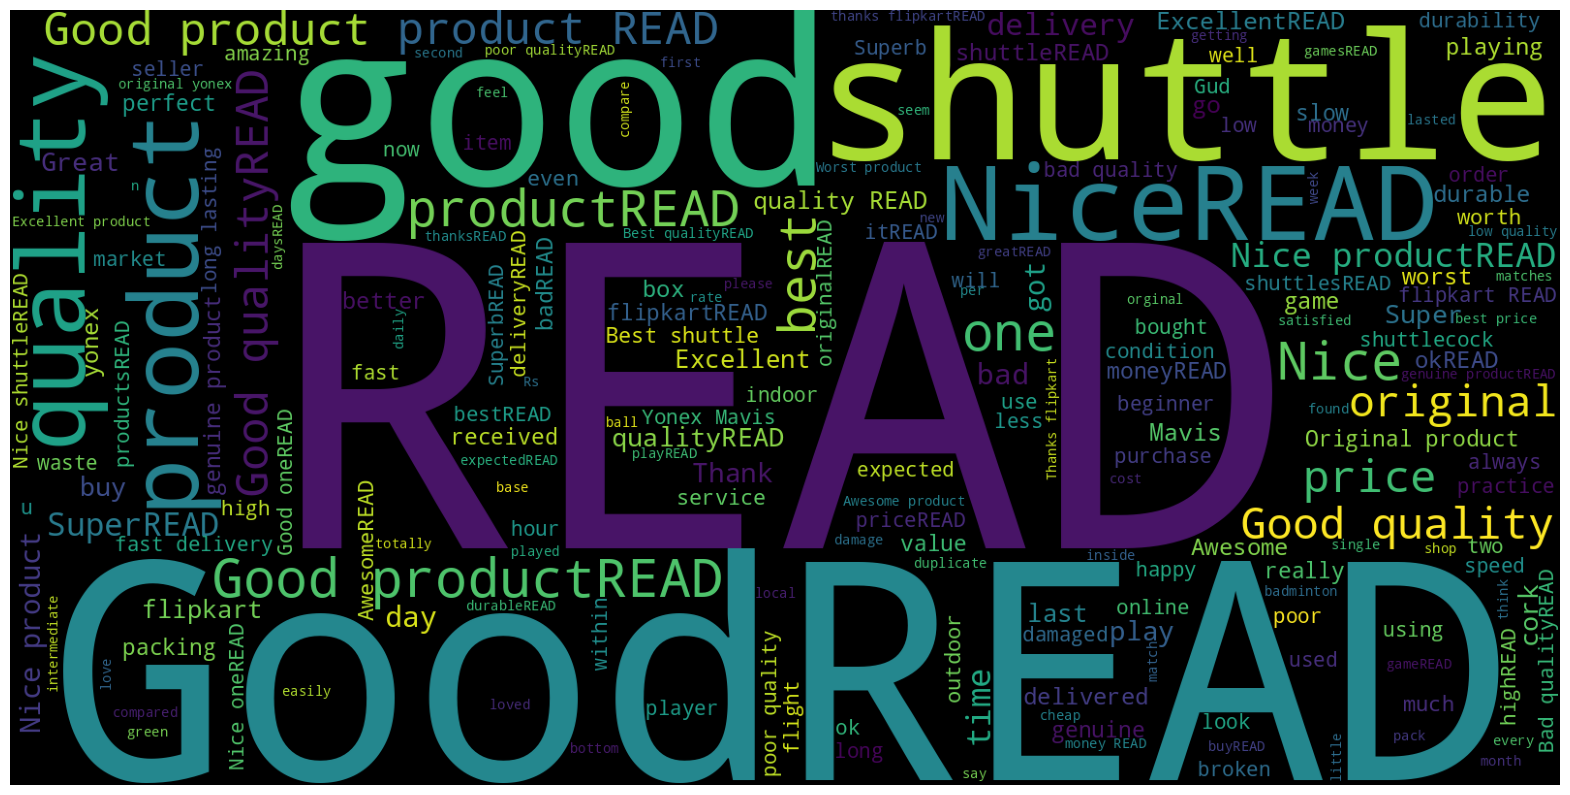

In [ ]:
display_wordcloud(X_train['Text'])

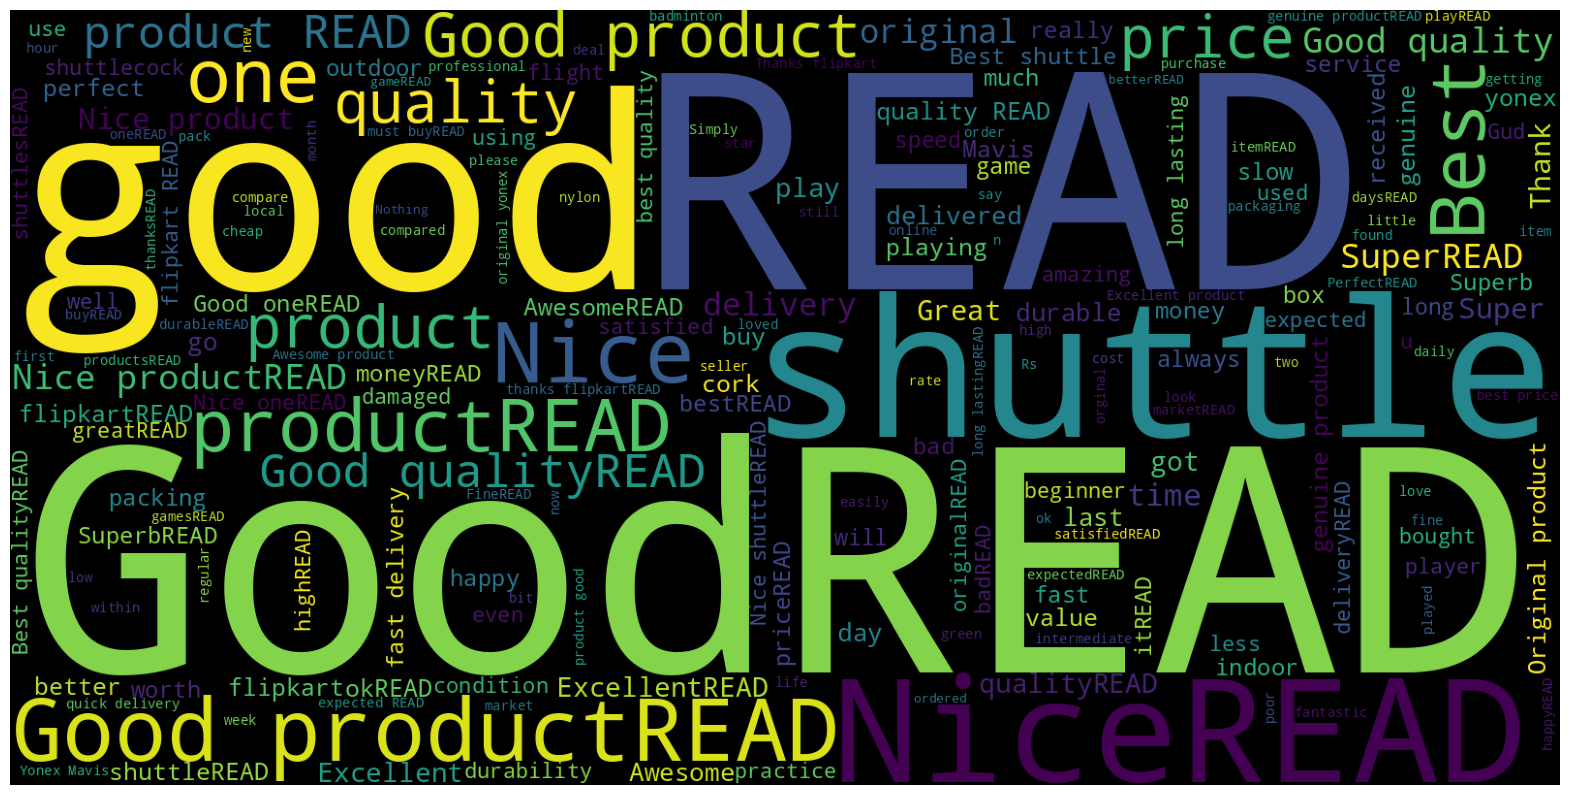

In [ ]:
display_wordcloud(X_train.Text[y_train=='Positive'])

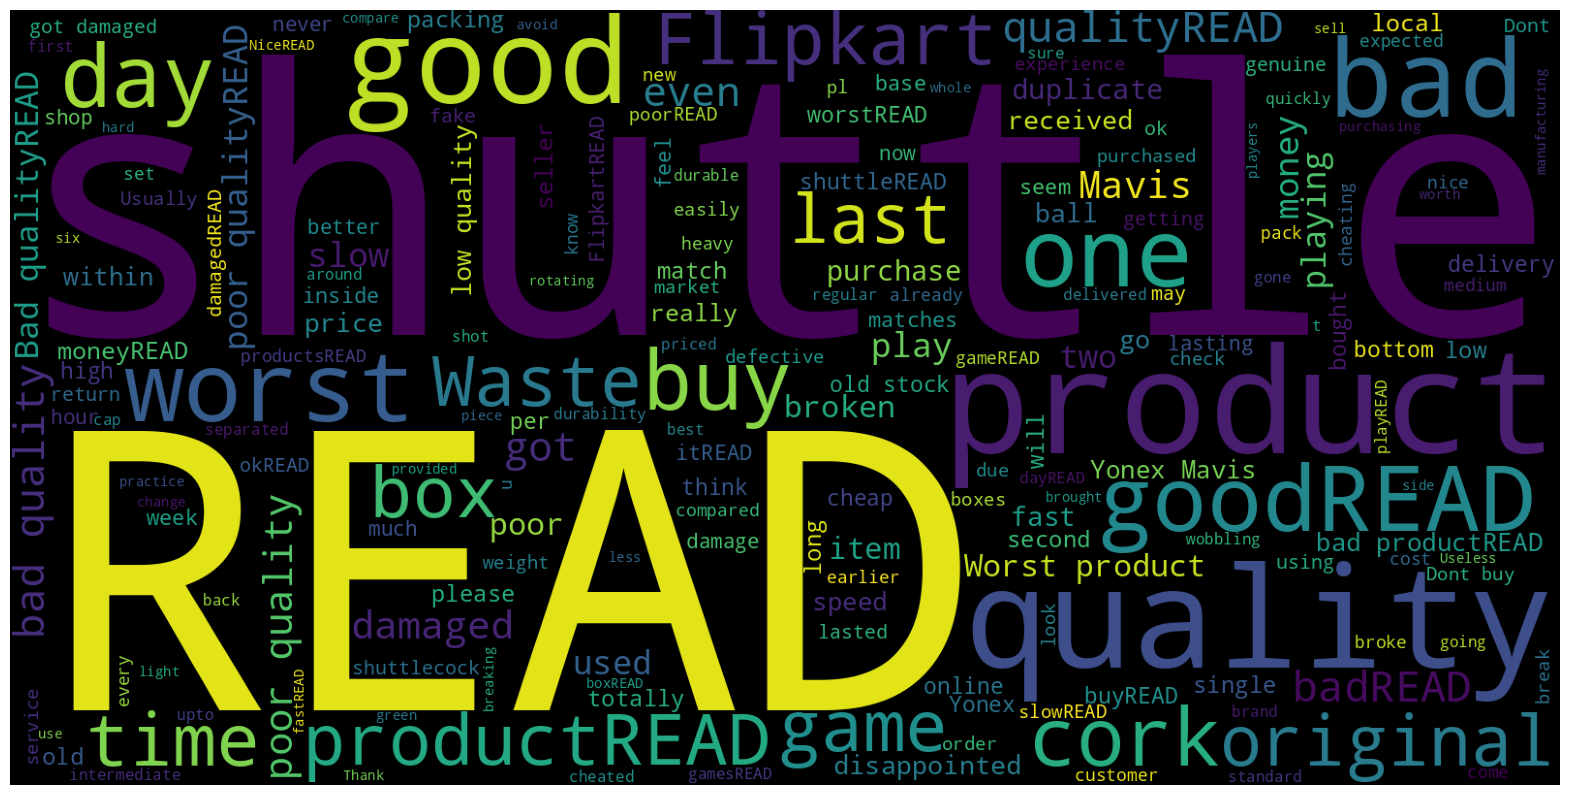

In [ ]:
display_wordcloud(X_train.Text[y_train=='Negative'])

In [ ]:
X_train_prep = X_train['Text'].progress_apply(lambda x: preprocess_text(x))
X_train_prep.head()

100%|██████████| 6808/6808 [00:05<00:00, 1214.43it/s]


1372                                                 good
3846    purchasing shuttle flipkart long time quality ...
333                                          nice product
1259    worst recent time played new ball today two ba...
3532                                               better
Name: Text, dtype: object

### Data Preprocessing on Test data

In [ ]:
X_test_prep = X_test['Text'].progress_apply(lambda x: preprocess_text(x))
X_test_prep.head()

100%|██████████| 1702/1702 [00:00<00:00, 3188.04it/s]


4392                     good
8424    good original product
2138             good quality
3538                     good
2684                   thanks
Name: Text, dtype: object

#### Bag Of Words

In [ ]:
vectorizer = CountVectorizer(max_features=5000)

##### ***BOW on "Train data"***

In [ ]:
X_train_bow = vectorizer.fit_transform(X_train_prep)
print("Shape of input data:", X_train_bow.shape)
print("Total unique words:", len(vectorizer.vocabulary_))
print("Type of train features:", type(X_train_bow))

Shape of input data: (6808, 2305)
Total unique words: 2305
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>


In [ ]:
# Words to array
X_train_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

##### ***BOW on "Test data"***

In [ ]:
X_test_bow = vectorizer.transform(X_test_prep)
print(X_test_bow.shape)

(1702, 2305)


#### **Tf-Idf**

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_prep).toarray()

In [ ]:
print(X_train_tfidf.shape)
X_train_tfidf[:5]

(6808, 2305)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_test_tfidf = tfidf_vectorizer.transform(X_test_prep).toarray()
X_test_tfidf.shape

(1702, 2305)

In [ ]:
X_test_tfidf[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Model Building on Train Data

In [ ]:
import joblib
from joblib import Memory

import os
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

##### BOW

In [ ]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'svc': Pipeline([
    ('vectorization', CountVectorizer()),
    ('classifier', SVC(kernel='linear')),
    ],memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'svc':[
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_df': [0.5, 0.75, 1.0],
            'vectorization__ngram_range': [(1, 1), (1, 2), (2, 2)],
            'classifier__C': [0.1, 1, 10],
        }
    ]

}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='accuracy',
                               return_train_score=True,
                               verbose=1
                              )

    %time grid_search.fit(X_train_prep, y_train)

    best_models[algo] = grid_search.best_estimator_

    print('Score on Test Data: ', grid_search.score(X_test_prep, y_test))
    print("\n")

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: user 5.6 s, sys: 34.8 ms, total: 5.63 s
Wall time: 5.75 s
Score on Test Data:  0.9165687426556992


********** logistic_regression **********
Fitting 5 folds for each of 36 candidates, totalling 180 fits
CPU times: user 6min 31s, sys: 681 ms, total: 6min 32s
Wall time: 7min 48s
Score on Test Data:  0.9054054054054054


********** decision_tree **********
Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: user 10.8 s, sys: 52.9 ms, total: 10.8 s
Wall time: 10.9 s
Score on Test Data:  0.9136310223266745


********** svc **********
Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: user 3min 15s, sys: 2.99 s, total: 3min 18s
Wall time: 3min 43s
Score on Test Data:  0.9195064629847238




In [ ]:
import os
from sklearn import metrics

for name, model in best_models.items():
    print("*" * 10, name, "*" * 10)

    joblib.dump(model, f'{name}.pkl')
    model = joblib.load(f'{name}.pkl')

    y_train_pred = model.predict(X_train_prep)
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    train_f1 = metrics.f1_score(y_train, y_train_pred, average='weighted')
    print("Train Accuracy Score:", train_accuracy)
    print("Train F1 Score:", train_f1)

    y_test_pred = model.predict(X_test_prep)
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
    test_f1 = metrics.f1_score(y_test, y_test_pred, average='weighted')
    print("Test Accuracy Score:", test_accuracy)
    print("Test F1 Score:", test_f1)

    print("Model Size:", os.path.getsize(f'{name}.pkl'), "Bytes")
    print("\n")

********** naive_bayes **********
CPU times: user 62.8 ms, sys: 0 ns, total: 62.8 ms
Wall time: 72.4 ms
Train Accuracy Score: 0.9283196239717979
Train F1 Score: 0.9261868394293202
CPU times: user 17.4 ms, sys: 4 µs, total: 17.4 ms
Wall time: 17.6 ms
Test Accuracy Score: 0.9165687426556992
Test F1 Score: 0.9128660382650633
Model Size: 80215 Bytes


********** logistic_regression **********
CPU times: user 63.9 ms, sys: 3 µs, total: 63.9 ms
Wall time: 65.4 ms
Train Accuracy Score: 0.9400705052878966
Train F1 Score: 0.9423192629017727
CPU times: user 19.6 ms, sys: 0 ns, total: 19.6 ms
Wall time: 20 ms
Test Accuracy Score: 0.9054054054054054
Test F1 Score: 0.9086928315908447
Model Size: 85706 Bytes


********** decision_tree **********
CPU times: user 65.1 ms, sys: 0 ns, total: 65.1 ms
Wall time: 76.1 ms
Train Accuracy Score: 0.9299353701527615
Train F1 Score: 0.9227143534863964
CPU times: user 18.9 ms, sys: 8 µs, total: 18.9 ms
Wall time: 25.9 ms
Test Accuracy Score: 0.9136310223266745
Te

In [ ]:
! pip install scikit-learn imbalanced-learn

#### **Tfidf**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

def multinomial_naive_bayes(X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ])

    params = {
        'tfidf__max_df': [0.25, 0.5, 0.75, 1.0],
        'tfidf__min_df': [1, 5],
        'tfidf__ngram_range': [(1, 1), (1, 2)],
        'clf__alpha': [0.1, 0.5, 1.0]
    }

    grid_search = GridSearchCV(pipeline, params, cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    print("\nMultinomial Naive Bayes:")

    # Print the scores
    print("Train Score:", train_score)
    print("Test Score:", test_score)

    y_pred = best_model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Save the best model
    joblib.dump(best_model, 'best_multinomial_nb_tfidf.pkl')


def support_vector_machine(X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', SVC(kernel='linear'))
    ])

    params = {
        'tfidf__max_df': [0.25, 0.5, 0.75, 1.0],
        'tfidf__min_df': [1, 5],
        'tfidf__ngram_range': [(1, 1), (1, 2)],
        'clf__C': [0.1, 1.0, 10.0]
    }

    grid_search = GridSearchCV(pipeline, params, cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    print("\nSupport Vector Machine:")

    # Print the scores
    print("Train Score:", train_score)
    print("Test Score:", test_score)

    y_pred = best_model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Save the best model
    joblib.dump(best_model, 'best_svc_tfidf.pkl')


def decision_tree(X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', DecisionTreeClassifier())
    ])

    params = {
        'tfidf__max_df': [0.25, 0.5, 0.75, 1.0],
        'tfidf__min_df': [1, 5],
        'tfidf__ngram_range': [(1, 1), (1, 2)],
        'clf__max_depth': [None, 5, 10, 20]
    }

    grid_search = GridSearchCV(pipeline, params, cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    print("\nDecision Tree:")
    # Print the scores
    print("Train Score:", train_score)
    print("Test Score:", test_score)


    y_pred = best_model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Save the best model
    joblib.dump(best_model, 'best_dt_tfidf.pkl')


def random_forest(X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', RandomForestClassifier())
    ])

    params = {
        'tfidf__max_df': [0.25, 0.5, 0.75, 1.0],
        'tfidf__min_df': [1, 5],
        'tfidf__ngram_range': [(1, 1), (1, 2)],
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [None, 5, 10, 20]
    }

    grid_search = GridSearchCV(pipeline, params, cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    print("\nRandom Forest:")

    # Print the scores
    print("Train Score:", train_score)
    print("Test Score:", test_score)


    y_pred = best_model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Save the best model
    joblib.dump(best_model, 'best_rf_tfidf.pkl')


def logistic_regression(X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', LogisticRegression())
    ])

    params = {
        'tfidf__max_df': [0.25, 0.5, 0.75, 1.0],
        'tfidf__min_df': [1, 5],
        'tfidf__ngram_range': [(1, 1), (1, 2)],
        'clf__C': [0.1, 1.0, 10.0],
        'clf__penalty': ['l1', 'l2']
    }

    grid_search = GridSearchCV(pipeline, params, cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    print("\nLogistic Regression:")
    # Print the scores
    print("Train Score:", train_score)
    print("Test Score:", test_score)


    y_pred = best_model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Save the best model
    joblib.dump(best_model, 'best_logistic_tfidf.pkl')


def k_neighbors(X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', KNeighborsClassifier())
    ])

    params = {
        'tfidf__max_df': [0.25, 0.5, 0.75, 1.0],
        'tfidf__min_df': [1, 5],
        'tfidf__ngram_range': [(1, 1), (1, 2)],
        'clf__n_neighbors': [3, 5, 10]
    }

    grid_search = GridSearchCV(pipeline, params, cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    print("\nK-Neighbors:")

    # Print the scores
    print("Train Score:", train_score)
    print("Test Score:", test_score)

    y_pred = best_model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Save the best model
    joblib.dump(best_model, 'best_k_neighbors_tfidf.pkl')


In [ ]:
%time multinomial_naive_bayes(X_train_prep, y_train, X_test_prep, y_test)


Multinomial Naive Bayes:
Train Score: 0.9318448883666275
Test Score: 0.918331374853114
              precision    recall  f1-score   support

    Negative       0.75      0.53      0.62       216
    Positive       0.93      0.98      0.95      1486

    accuracy                           0.92      1702
   macro avg       0.84      0.75      0.79      1702
weighted avg       0.91      0.92      0.91      1702

CPU times: user 1.11 s, sys: 51.9 ms, total: 1.16 s
Wall time: 17.7 s


In [ ]:
support_vector_machine(X_train_prep, y_train, X_test_prep, y_test)


Support Vector Machine:
Train Score: 0.961662749706228
Test Score: 0.9159811985898942
              precision    recall  f1-score   support

    Negative       0.73      0.54      0.62       216
    Positive       0.94      0.97      0.95      1486

    accuracy                           0.92      1702
   macro avg       0.83      0.76      0.79      1702
weighted avg       0.91      0.92      0.91      1702

CPU times: user 5.5 s, sys: 252 ms, total: 5.75 s
Wall time: 1min 49s


In [ ]:
decision_tree(X_train_prep, y_train, X_test_prep, y_test)


Decision Tree:
Train Score: 0.9305229142185664
Test Score: 0.9118683901292597
              precision    recall  f1-score   support

    Negative       0.78      0.43      0.55       216
    Positive       0.92      0.98      0.95      1486

    accuracy                           0.91      1702
   macro avg       0.85      0.70      0.75      1702
weighted avg       0.90      0.91      0.90      1702

CPU times: user 1.78 s, sys: 84 ms, total: 1.87 s
Wall time: 26.1 s


In [ ]:
random_forest(X_train_prep, y_train, X_test_prep, y_test)


Random Forest:
Train Score: 0.9684195064629847
Test Score: 0.9159811985898942
              precision    recall  f1-score   support

    Negative       0.79      0.46      0.58       216
    Positive       0.93      0.98      0.95      1486

    accuracy                           0.92      1702
   macro avg       0.86      0.72      0.77      1702
weighted avg       0.91      0.92      0.91      1702

CPU times: user 9.01 s, sys: 904 ms, total: 9.91 s
Wall time: 8min 3s


In [ ]:
logistic_regression(X_train_prep, y_train, X_test_prep, y_test)


Logistic Regression:
Train Score: 0.9578437132784959
Test Score: 0.9142185663924794
              precision    recall  f1-score   support

    Negative       0.74      0.50      0.60       216
    Positive       0.93      0.97      0.95      1486

    accuracy                           0.91      1702
   macro avg       0.83      0.74      0.78      1702
weighted avg       0.91      0.91      0.91      1702

CPU times: user 1.9 s, sys: 100 ms, total: 2 s
Wall time: 29.2 s


In [ ]:
k_neighbors(X_train_prep, y_train, X_test_prep, y_test)


K-Neighbors:
Train Score: 0.9206815511163338
Test Score: 0.8983548766157462
              precision    recall  f1-score   support

    Negative       0.68      0.38      0.48       216
    Positive       0.91      0.97      0.94      1486

    accuracy                           0.90      1702
   macro avg       0.80      0.67      0.71      1702
weighted avg       0.89      0.90      0.89      1702

CPU times: user 6.41 s, sys: 383 ms, total: 6.79 s
Wall time: 1min 20s


In [ ]:
# Load the desired model for prediction
load_model = joblib.load('best_rf_tfidf.pkl')

# Example new text
new_text = "damaged product, returning it"

# Preprocess the new text
preprocessed_text = preprocess_text(new_text)

# Use the loaded model to predict the emotion label
predicted_label = load_model.predict([preprocessed_text])[0]

# Output the predicted label
print("Predicted emotion label:", predicted_label)


Predicted emotion label: Negative


#### **To balanced dataset**

In [ ]:
"""from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd


# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=42)

# Step 2: TF-IDF vectorization on train and test sets separately
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Now you can proceed with your modeling steps using X_resampled and y_resampled for training, and X_test_tfidf and y_test for testing


# Step 3: Class balancing on train data only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)
"""

In [ ]:
"""from collections import Counter

# Count the occurrences of each class label before and after SMOTE
class_distribution_before = Counter(y_train)
class_distribution_after = Counter(y_train_balanced)

print("Class Distribution Before SMOTE:", class_distribution_before)
print("Class Distribution After SMOTE:", class_distribution_after)"""

Class Distribution Before SMOTE: Counter({'Positive': 5458, 'Negative': 856, 'Neutral': 494})
Class Distribution After SMOTE: Counter({'Positive': 5458, 'Negative': 5458, 'Neutral': 5458})


In [ ]:
"""from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier


# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
    'random_forest': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', RandomForestClassifier())
    ], memory=memory),
    'knn': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', KNeighborsClassifier())
    ], memory=memory),
    'sgd_classifier': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', SGDClassifier())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}


########################################################################
# Add additional pipelines for different classification models
pipelines.update({

})

# Add parameter grids for additional classification models
param_grids.update({
    'random_forest': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'knn': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    ],
    'sgd_classifier': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha': [0.0001, 0.001, 0.01],
            'classifier__penalty': ['l2', 'l1', 'elasticnet'],
            'classifier__class_weight': ['balanced', None]
        }
    ]
})

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1',
                               return_train_score=True,
                               verbose=1
                              )

    %time grid_search.fit(X_train_clean, y_train)

    best_models[algo] = grid_search.best_estimator_

    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))
"""

In [ ]:
! pip --version



pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [ ]:
! pip scikit-learn --version

ERROR: unknown command "scikit-learn"
